# Assignment_06: Logistic Regression
# Output variable -> y
## y -> Whether the client has subscribed a term deposit or not Bi nomial ("yes" or "no")


In [103]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectFromModel

In [5]:
data_=pd.read_csv('bank-full.csv')
data_.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [6]:
data=pd.read_csv('bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data.shape

(45211, 17)

In [12]:
#check for null values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## no null value present in dataset.

In [17]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [19]:
data.duplicated().sum()

0

### No duplicate data.

### find unique features and their category

In [21]:
#to find unique features
category_features = data.select_dtypes(include=['object', 'bool']).columns.values
print('category_features  :' ,category_features ,'\n')

for column in category_features:
    print(column, " - ", len(data[column].unique()) , "values:\n",data[column].unique())

category_features  : ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y'] 

job  -  12 values:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  -  3 values:
 ['married' 'single' 'divorced']
education  -  4 values:
 ['tertiary' 'secondary' 'unknown' 'primary']
default  -  2 values:
 ['no' 'yes']
housing  -  2 values:
 ['yes' 'no']
loan  -  2 values:
 ['no' 'yes']
contact  -  3 values:
 ['unknown' 'cellular' 'telephone']
month  -  12 values:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  -  4 values:
 ['unknown' 'failure' 'other' 'success']
y  -  2 values:
 ['no' 'yes']


In [23]:
for column in category_features:
    print(column,'\n======================')
    print(data[column].value_counts(),'\n')

job 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
no     44396
yes      815
Name: default, dtype: int64 

housing 
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

poutcome 
unknown

# Data Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


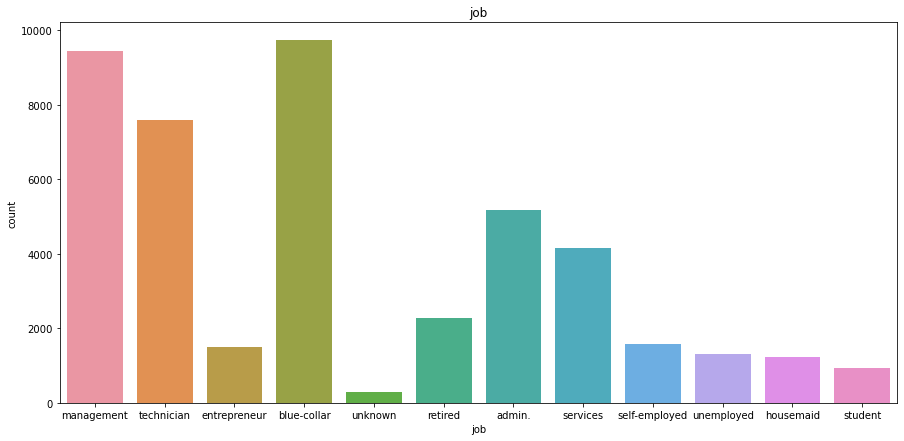

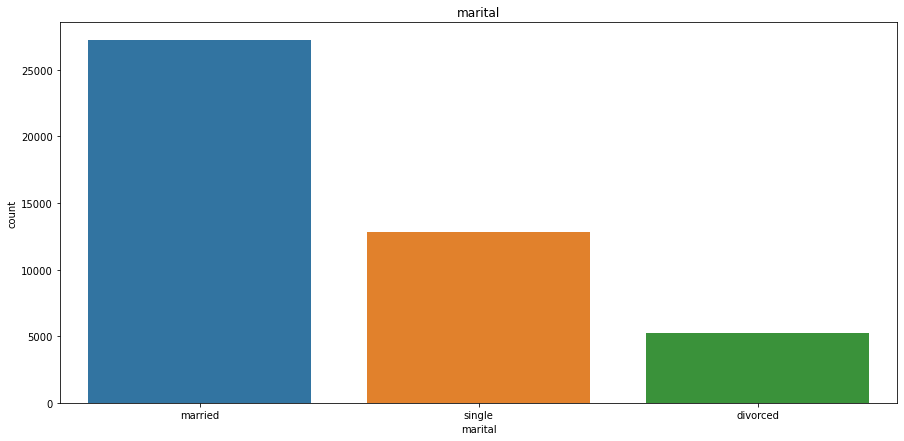

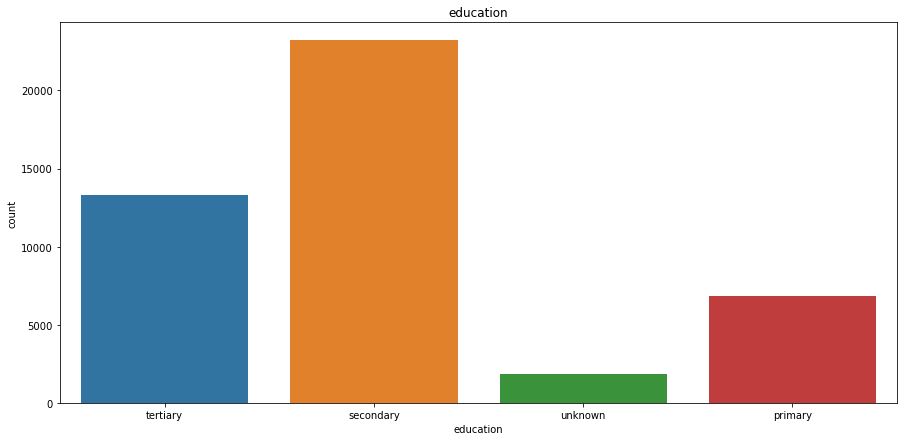

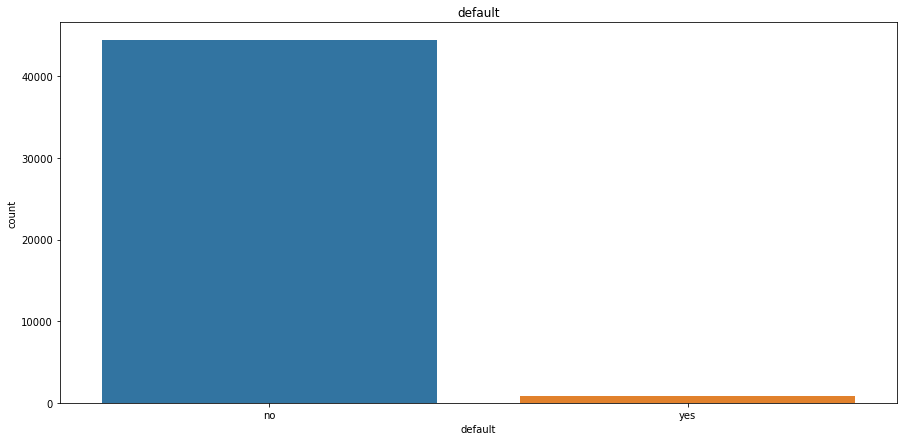

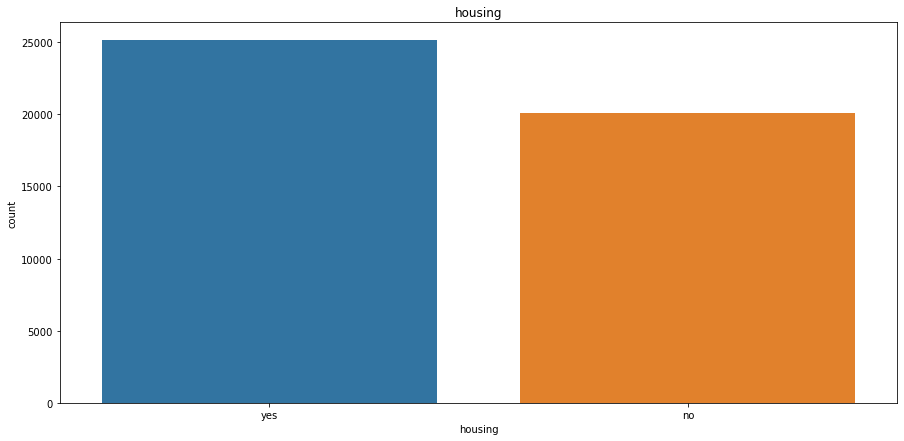

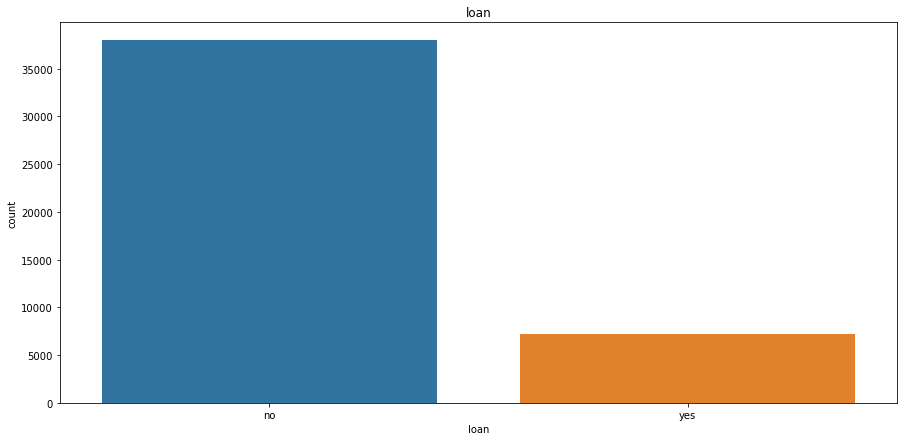

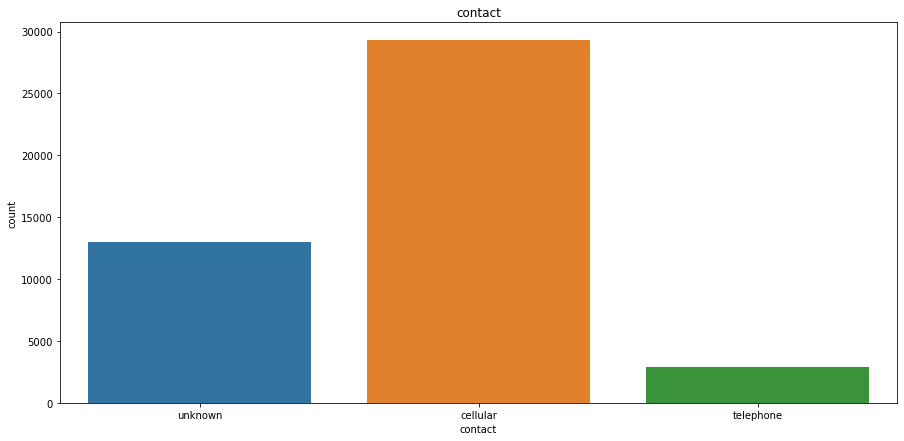

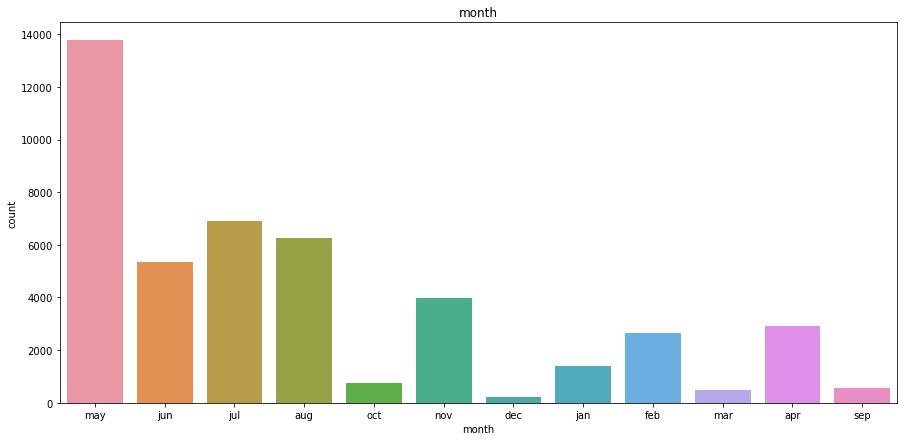

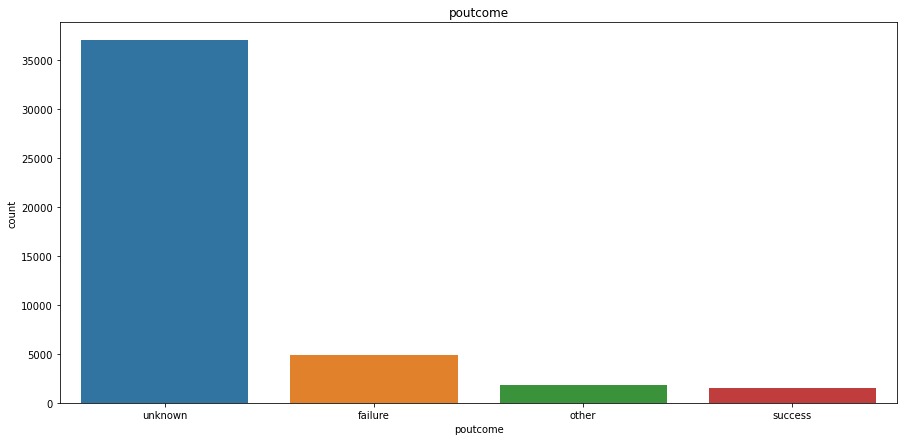

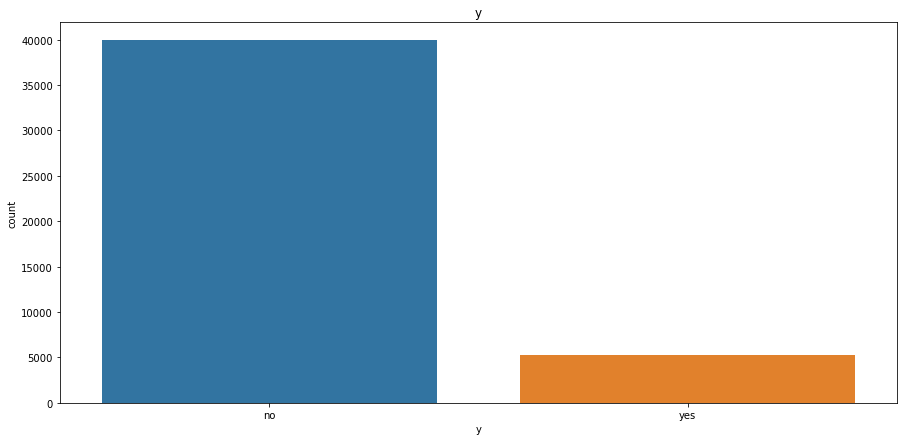

In [29]:
#count-plot
for column in category_features:
    plt.figure(figsize=(15,7))    
    sns.countplot(x=data[column],data=data)    
    plt.title(column) 

### Our observations:

### 1. Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.
### 2.Marital status: Most of them are married; married clients are twice as single people.
### 3.Education: Most clients have university education level while illiterate people are very less.
### 4.default/credit: Most people have no default stay on their credit file.
### 5.housing: Most people have no housing loan.
### 6.loan: Most people have no personal loan.
### 7.contact: Common means of communication are cellular.
### 8.month - May is the busy month and December is the least busy month (because of the holidays season).

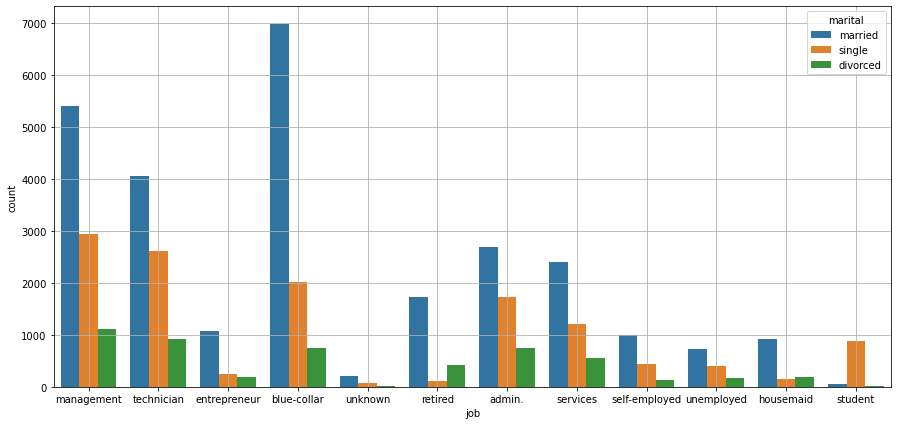

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='job',hue='marital',data=data)
plt.grid(True)
plt.show()

### there are high number of married persons and less numer of divorced persons from all job fields

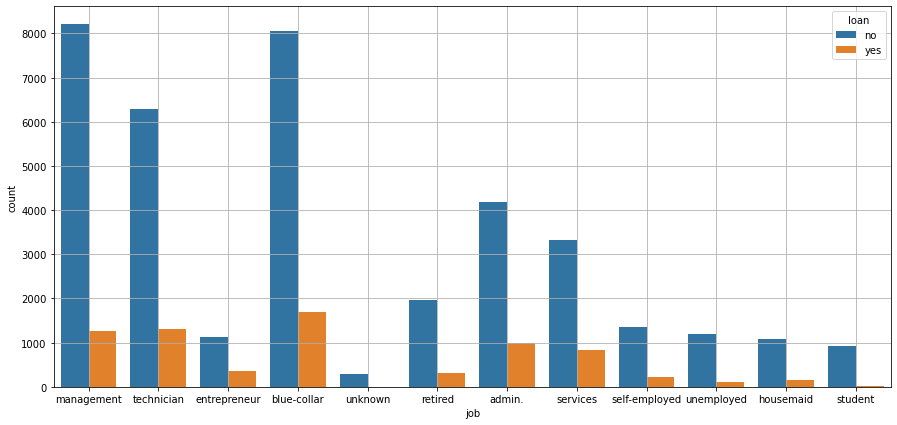

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='job',hue='loan',data=data)
plt.grid(True)
plt.show()

### maximum number of persons did not take loan 

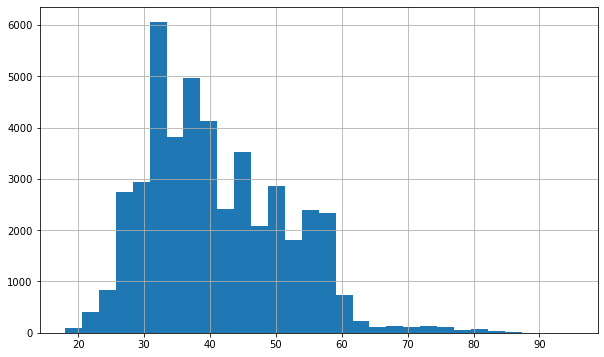

In [36]:
#histogram
data['age'].hist(bins=30,figsize=(10,6))
plt.show()

### most of the persons are belongs to 25 - 50 age group


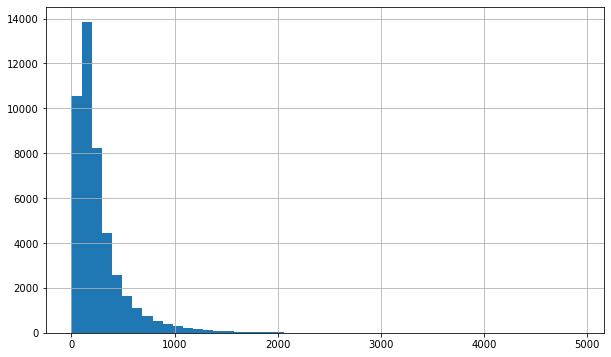

In [38]:
data['duration'].hist(bins=50,figsize=(10,6))
plt.show()

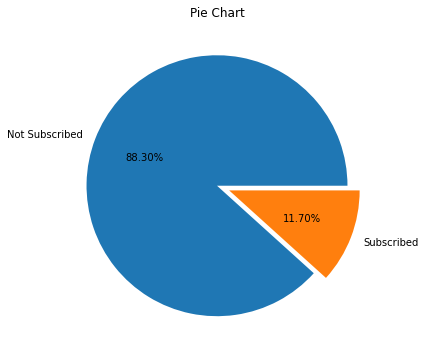

In [39]:
#subscription to the term deposit
plt.figure(figsize=(10,6))
plt.pie(data['y'].value_counts(),labels=['Not Subscribed','Subscribed'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart')
plt.show()

### 11.70% customers subscribed to the term deposit. Our classes are imbalanced where positive values (subscribed) are only 11.70%.

# Classification

In [58]:
data_new=pd.get_dummies(data)
data_new

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [59]:
data_new.shape

(45211, 53)

In [60]:
#remove unnecessary columns
#data_new.drop(['job_admin.','marital_married','education_tertiary','default_no','housing_no','loan_no',
#                          'contact_unknown', 'month_may','poutcome_unknown','y_no'],axis=1,inplace=True)
    

In [62]:
data_new.shape

(45211, 43)

In [64]:
data_new

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# data spliting 

In [67]:
X=data_new.drop('y_yes',axis=1)
y=data_new[['y_yes']]

In [71]:
#import libraries
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [75]:
X_train.shape,y_train.shape

((36168, 42), (36168, 1))

In [77]:
X_test.shape,y_test.shape

((9043, 42), (9043, 1))

# FEATURE SELECTION TECHNIQUES

## 1) Select From Model Technique

In [80]:
select_from_model = SelectFromModel(estimator = LogisticRegression(),max_features=None)
select_from_model.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression())

In [86]:
select_from_model.get_support()

array([False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True])

In [87]:
X_train.columns[select_from_model.get_support()]

Index(['campaign', 'job_blue-collar', 'job_retired', 'job_services',
       'marital_single', 'education_secondary', 'housing_yes', 'loan_yes',
       'contact_cellular', 'month_oct', 'poutcome_failure',
       'poutcome_success'],
      dtype='object')

In [89]:
X_train_selected_features = select_from_model.transform(X_train)
X_test_selected_features  = select_from_model.transform(X_test)

In [91]:
X_train_selected_features.shape

(36168, 12)

In [93]:
X_test_selected_features.shape

(9043, 12)

In [95]:
def run_Logistic_Regression(X_train,y_train,X_test,y_test):
    lr_classifier = LogisticRegression(random_state=12)
    lr_classifier.fit(X_train,y_train) 

    y_pred = lr_classifier.predict(X_test)

    print('Accuracy Score  : ',round(accuracy_score(y_test,y_pred),4))
    print('Precision Score : ',round(precision_score(y_test,y_pred),4))
    print('Recall Score    : ',round(recall_score(y_test,y_pred),4))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

### considering all features

In [104]:
#call the above function
all_features=run_Logistic_Regression(X_train,y_train,X_test,y_test) 
all_features

Accuracy Score  :  0.893
Precision Score :  0.6073
Recall Score    :  0.221
Confusion Matrix:
 [[7843  150]
 [ 818  232]]


## selected features

In [105]:
selected_fea_sfm=run_Logistic_Regression(X_train_selected_features,y_train,X_test_selected_features,y_test)
selected_fea_sfm

Accuracy Score  :  0.8911
Precision Score :  0.6245
Recall Score    :  0.1552
Confusion Matrix:
 [[7895   98]
 [ 887  163]]


# 2. RFE - Recursive Feature Elimination

In [106]:
rfe_model = RFE(estimator = LogisticRegression(),n_features_to_select=None)
rfe_model.fit(X_train,y_train)

RFE(estimator=LogisticRegression())

In [108]:
rfe_model.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True])

In [110]:
X_train.columns[rfe_model.get_support()]

Index(['job_housemaid', 'job_retired', 'job_student', 'marital_divorced',
       'marital_single', 'education_primary', 'housing_yes', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

In [111]:
X_train_rfe_selected = rfe_model.transform(X_train)
X_test_rfe_selected  = rfe_model.transform(X_test)

In [113]:
X_train_rfe_selected.shape

(36168, 21)

In [115]:
X_test_rfe_selected.shape

(9043, 21)

In [117]:
selected_fea_rfe=run_Logistic_Regression(X_train_rfe_selected,y_train,X_test_rfe_selected,y_test)
selected_fea_rfe

Accuracy Score  :  0.8902
Precision Score :  0.6022
Recall Score    :  0.16
Confusion Matrix:
 [[7882  111]
 [ 882  168]]


# this accuracy score is not good as compare to Select From Model Technique.
# Hence we select best festures from Select From Model technique

In [118]:
selected_col=X_train.columns[select_from_model.get_support()]
print(selected_col.tolist())

['campaign', 'job_blue-collar', 'job_retired', 'job_services', 'marital_single', 'education_secondary', 'housing_yes', 'loan_yes', 'contact_cellular', 'month_oct', 'poutcome_failure', 'poutcome_success']


In [120]:
selected_col_test=X_test.columns[select_from_model.get_support()]
print(selected_col_test.tolist())

['campaign', 'job_blue-collar', 'job_retired', 'job_services', 'marital_single', 'education_secondary', 'housing_yes', 'loan_yes', 'contact_cellular', 'month_oct', 'poutcome_failure', 'poutcome_success']


In [122]:
X_train_final = X_train[selected_col.tolist()]
y_train_final = y_train['y_yes']
X_test_final = X_test[selected_col_test.tolist()]
y_test_final = y_test

X_test_final.head()

,campaign,job_blue-collar,job_retired,job_services,marital_single,education_secondary,housing_yes,loan_yes,contact_cellular,month_oct,poutcome_failure,poutcome_success
38440,6,0,0,1,0,1,1,0,1,0,0,0
40402,1,0,1,0,0,0,0,0,0,0,0,0
3708,1,0,0,0,1,0,1,0,0,0,0,0
37421,2,0,0,1,1,0,1,0,0,0,0,0
12526,1,1,0,0,0,1,0,1,0,0,0,0


In [123]:
X_test_final.shape

(9043, 12)

# Model Training

In [124]:
logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

# Model Testing || Model Evaluation 

In [126]:
y_pred_test = pd.DataFrame(logreg.predict(X_test_final))
y_pred_test.head()

,0
0,0
1,0
2,0
3,0
4,0


In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y_test_final,y_pred_test)
accuracy = accuracy_score(y_test_final,y_pred_test)
print('confusion_matrix :\n',confusion_matrix,'\nAccuracy of logistic regression classifier on test set:' ,accuracy)

confusion_matrix :
 [[7895   98]
 [ 887  163]] 
Accuracy of logistic regression classifier on test set: 0.8910759703638174


In [134]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_final,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7993
           1       0.62      0.16      0.25      1050

    accuracy                           0.89      9043
   macro avg       0.76      0.57      0.59      9043
weighted avg       0.87      0.89      0.86      9043



# Model accuracy is : 89% 

# Roc Curve

Text(0, 0.5, 'True Positive Rate')

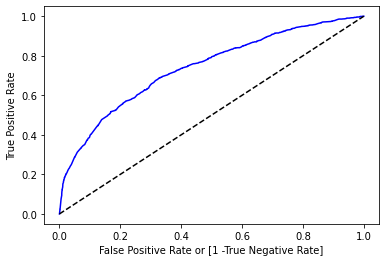

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test_final,logreg.predict_proba (X_test_final)[:,1])
auc = roc_auc_score(y_test_final,y_pred_test)

plt.plot(fpr,tpr,color = 'blue',label = 'logistic model (area = %0.2f)'%auc)
plt.plot([0,1],[0, 1],'k--')
plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
plt.ylabel('True Positive Rate')

In [137]:

print("area under the curve:",auc*100,'%')

area under the curve: 57.148868355048755 %
